图片的显示与读写操作
===

# 1.读取

In [2]:
import cv2
images1 = cv2.imread("Images/01/09/01.jpg", 0)
print(images1)
images2 = cv2.imread("Images/01/09/02.jpg", 1)
print(images2)

[[ 1  1  1 ...  3  3  2]
 [ 1  1  1 ...  4  3  2]
 [ 1  1  1 ...  5  3  2]
 ...
 [56 26 42 ... 52 52 51]
 [27 29 69 ... 60 59 56]
 [14 35 59 ... 58 57 51]]
[[[ 26  39  31]
  [ 10  24  13]
  [  5  21  10]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27  42  34]
  [ 13  29  18]
  [ 20  38  25]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[ 27  47  35]
  [ 23  43  30]
  [ 24  47  33]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[119 144 160]
  [124 149 165]
  [126 150 168]
  ...
  [109 129 147]
  [112 132 150]
  [106 126 144]]

 [[131 156 172]
  [125 150 166]
  [124 148 166]
  ...
  [106 126 144]
  [108 128 146]
  [102 122 140]]

 [[117 143 157]
  [ 98 124 138]
  [103 128 144]
  ...
  [102 124 142]
  [103 125 143]
  [ 98 120 138]]]


# 2.显示

In [ ]:
cv2.imshow("image1", images1)
cv2.imshow("image2", images2)
cv2.waitKey(0)

imshow方法会打开新窗口显示图片，为了在jupyter里面显示，我们以后都是用matplotlib来进行图片显示

# 3.显示图片

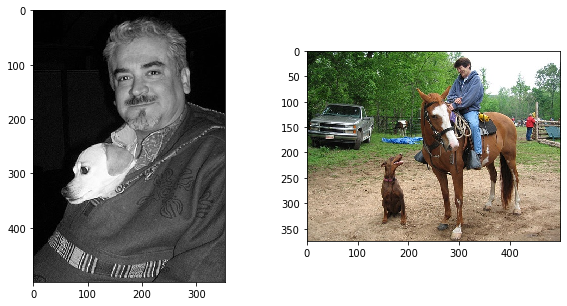

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 2, 1)
show_img1 = cv2.cvtColor(images1, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img1)

plt.subplot(1, 2, 2)
show_img2 = cv2.cvtColor(images2, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

由于cv2读取出来的图片默认是BGR编码的，我们使用matplotlib显示的时候需要转化为RGB编码

# 4.图像缩放

In [4]:
shapes = images2.shape
print(shapes)

(375, 500, 3)


(300, 400, 3)


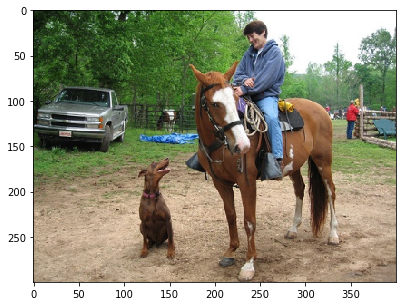

In [5]:
height = shapes[0]
width = shapes[1]
dst_height = int(height * 0.8)
dst_width = int(width * 0.8)
dst = cv2.resize(images2, (dst_width, dst_height))
print(dst.shape)
plt.figure(figsize=(10,5), facecolor='w')
show_img2 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 5.图片规则裁剪

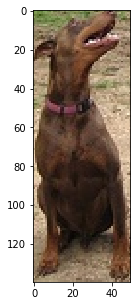

In [20]:
dst = images2[205:345, 145:195] # [x1:x2, y1:y2]
plt.figure(figsize=(10,5), facecolor='w')
show_img2 = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB) 
plt.imshow(show_img2)

# 6.图片不规则裁剪

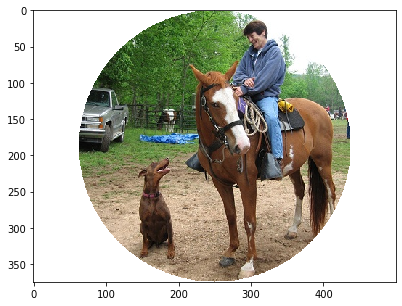

In [39]:
import numpy as np
img = cv2.imread("Images/01/09/02.jpg", cv2.IMREAD_UNCHANGED)
height, width, channel = img.shape
img_new = np.zeros((height, width, 4), dtype=np.uint8)
img_new[:, :, 0:3] = img[:, :, 0:3]
img_circle = np.zeros((height, width, 1), dtype=np.uint8)
img_circle[:, :, :] = 0
img_circle = cv2.circle(img_circle, (width // 2, height // 2), int(min(height, width) / 2), 255, -1)
img_new[:, :, 3] = img_circle[:, :, 0]

plt.figure(figsize=(10,5), facecolor='w')
unReg = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGBA) 
plt.imshow(unReg)
